In [17]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')
data['RiskLevel'] = data['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})
data['PulsePressure'] = data['SystolicBP'] - data['DiastolicBP']
data['MAP'] = data['DiastolicBP'] + (data['PulsePressure'] / 3)
data['BPRatio'] = data['SystolicBP'] / data['DiastolicBP']
data.drop(columns=(['HeartRate', 'DiastolicBP']), inplace=True)


x = data.drop(columns=['RiskLevel'])
y = data['RiskLevel']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=10)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
load_model = tf.keras.models.load_model('maternal_health_risk_model.keras')
y_new_pred_train = load_model.predict(x_train)
y_new_pred_test = load_model.predict(x_test)
y_new_pred_train_classes = np.argmax(y_new_pred_train, axis=1)
y_new_pred_test_classes = np.argmax(y_new_pred_test, axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
A = confusion_matrix(y_train, y_new_pred_train_classes)
num_classes = A.shape[0]

TP = np.diag(A)
FP = np.sum(A, axis=0) - TP
FN = np.sum(A, axis=1) - TP
TN = np.sum(A) - (TP + FP + FN)

# Precision: TP / (TP + FP)
precision_per_class = TP / (TP + FP + 1e-12)

# Recall: TP / (TP + FN)
recall_per_class = TP / (TP + FN + 1e-12)

# Accuracy
accuracy = np.sum(TP) / np.sum(A)

# Macro averages
precision_macro = np.mean(precision_per_class)
recall_macro = np.mean(recall_per_class)

print("\n=== TRAIN METRICS ===")
print("Accuracy:", accuracy)

print("\nPrecision per class:", precision_per_class)
print("Macro Precision:", precision_macro)

print("\nRecall per class:", recall_per_class)
print("Macro Recall:", recall_macro)


=== TRAIN METRICS ===
Accuracy: 0.883855981416957

Precision per class: [0.87777778 0.85931559 0.92016807]
Macro Precision: 0.8857538114527571

Recall per class: [0.90544413 0.80141844 0.95217391]
Macro Recall: 0.8863454929447597


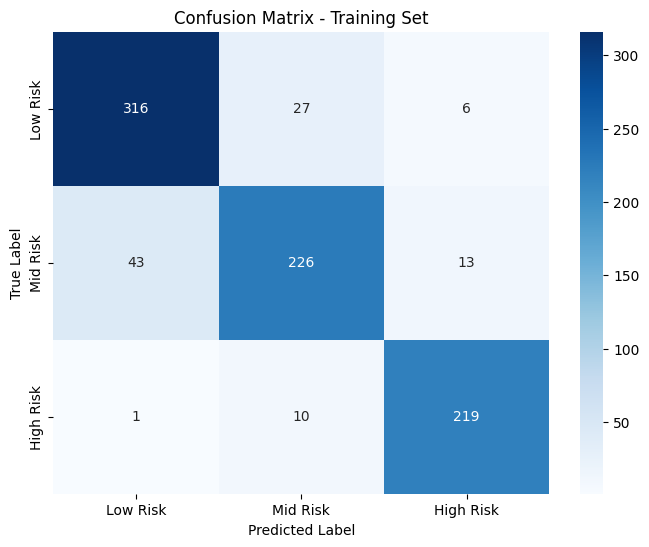

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(A, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Training Set')
plt.show()

In [22]:
A = confusion_matrix(y_test, y_new_pred_test_classes)
num_classes = A.shape[0]

TP = np.diag(A)
FP = np.sum(A, axis=0) - TP
FN = np.sum(A, axis=1) - TP
TN = np.sum(A) - (TP + FP + FN)

# Precision: TP / (TP + FP)
precision_per_class = TP / (TP + FP + 1e-12)

# Recall: TP / (TP + FN)
recall_per_class = TP / (TP + FN + 1e-12)

# Accuracy
accuracy = np.sum(TP) / np.sum(A)

# Macro averages
precision_macro = np.mean(precision_per_class)
recall_macro = np.mean(recall_per_class)

print("\n=== TEST METRICS ===")
print("Accuracy:", accuracy)

print("\nPrecision per class:", precision_per_class)
print("Macro Precision:", precision_macro)

print("\nRecall per class:", recall_per_class)
print("Macro Recall:", recall_macro)


=== TEST METRICS ===
Accuracy: 0.8431372549019608

Precision per class: [0.8        0.81481481 0.94871795]
Macro Precision: 0.8545109211775702

Recall per class: [0.84210526 0.81481481 0.88095238]
Macro Recall: 0.8459574863083464


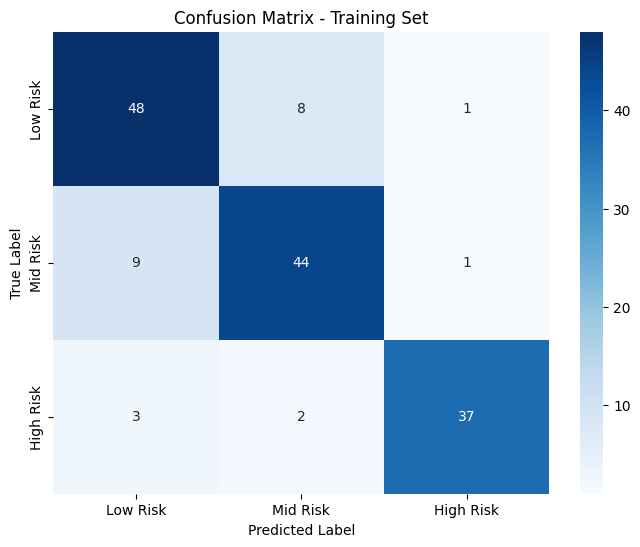

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(A, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'Mid Risk', 'High Risk'], yticklabels=['Low Risk', 'Mid Risk', 'High Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Training Set')
plt.show()